# Credit card Fraud Detection System

- A program that detects fraud among about 280,000 credit card transaction data

# Module Import

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler 

# Data Load

In [3]:
df = pd.read_csv("./data/creditcard.csv")  

In [4]:
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
type(df.head)

method

# Missing Value Check

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
df.isnull().sum() / df.shape[0]

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

# Correlation Visualize

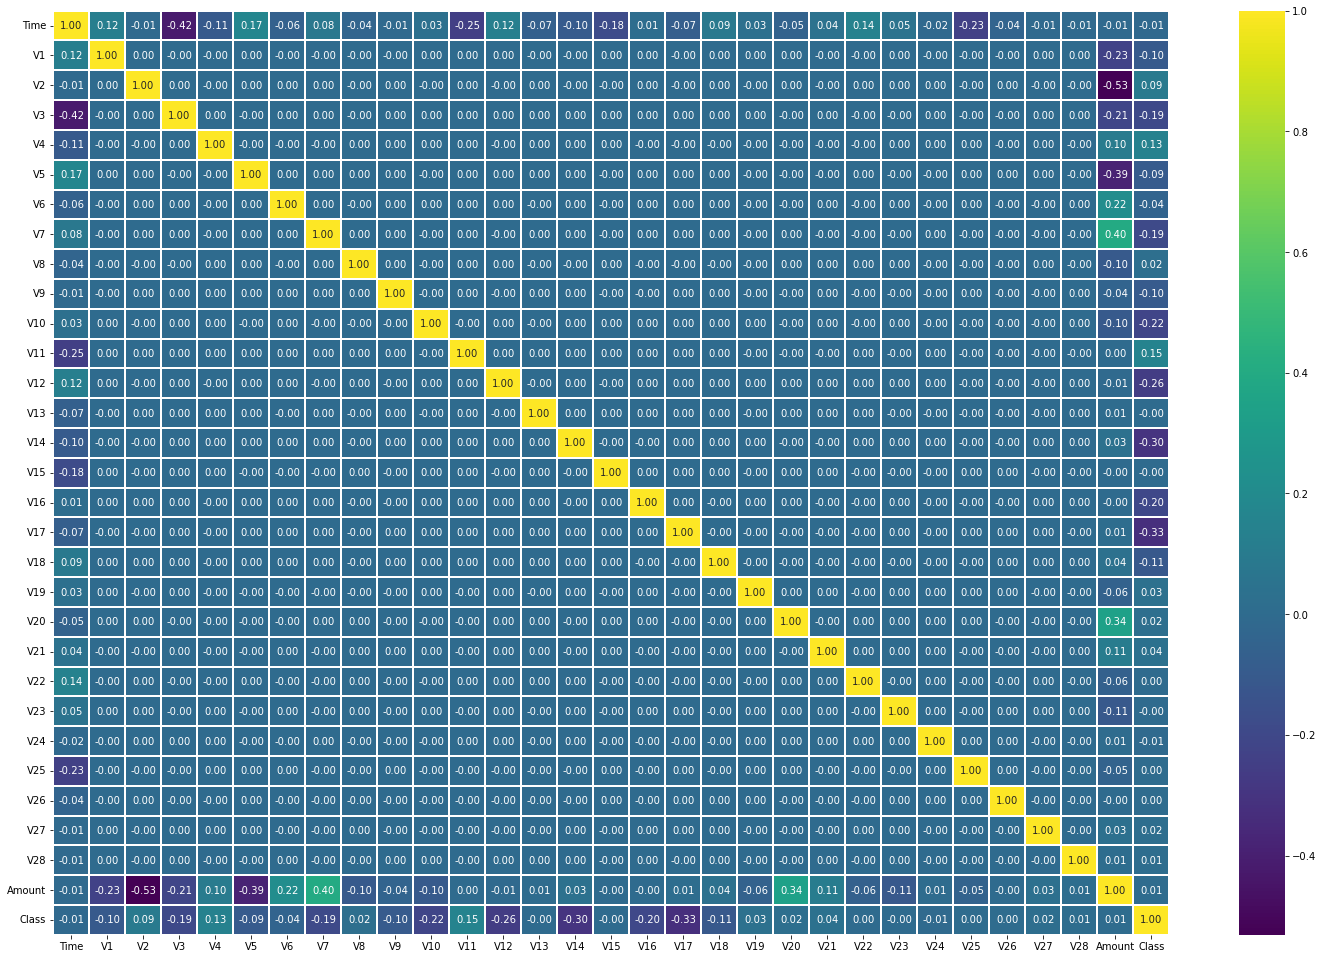

In [9]:
import seaborn
f, ax = plt.subplots(figsize = (25,17))
seaborn.heatmap(df.corr(), annot=True, linewidths=0.3, fmt="0.2f" , ax=ax, cmap="viridis")
plt.show()

#sns.heatmap(df, annot=True, fmt ='0.2f',cmap ="RdYlGn_r") # annot= True-> put numbers in each cells  
#plt.title("Correlation Visualize", fontsize= 20)

# EDA (Exploratory Data Analysis)
- Explore the overall structure of data

In [10]:
# 0 = Normal, 1.0 = Fraud (0.0017%)
print(df["Class"].value_counts())
count_classes = pd.value_counts(df["Class"], sort=True)
count_classes.head()
print()

print(df["Class"].value_counts(normalize=True))

0    284315
1       492
Name: Class, dtype: int64

0    0.998273
1    0.001727
Name: Class, dtype: float64


Text(0.5, 1.0, 'Transaction Class Distribution')

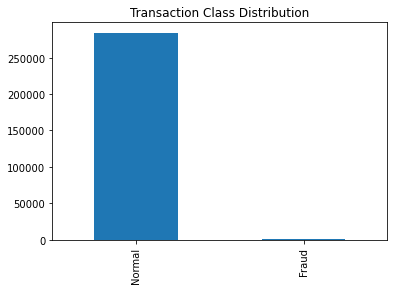

In [11]:
# Precision, Recall, F1 Score - reason) dataset imbalanced
labels = ["Normal","Fraud"]
count_classes.plot(kind="bar")
plt.xticks(range(2),labels) 
plt.title("Transaction Class Distribution")

## Time, Amount columns

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 172792.0)

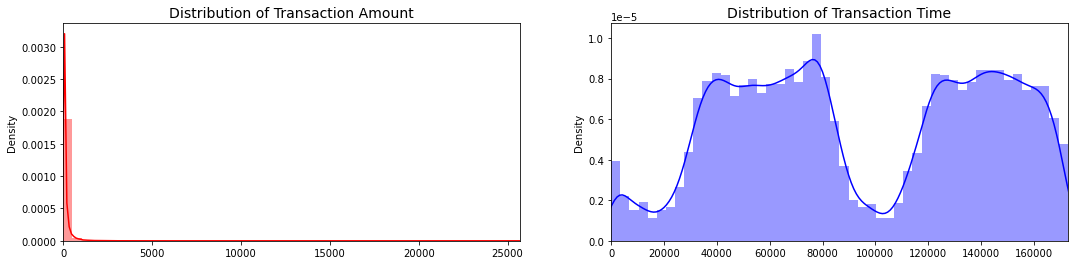

In [12]:
# EDA: Time, Amount features Distribution 
fig, ax = plt.subplots(1, 2, figsize = (18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

# Distribution of Transaciton Amount 
sns.distplot(amount_val, ax = ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

# Distribution of Transaction Time  
sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

In [13]:
df.drop(columns = "Time", inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [14]:
x_data = df.iloc[:,0:-1].values 
y_data = df.iloc[:,[-1]].values

x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

print(x_data.shape, y_data.shape)

(284807, 29) (284807, 1)


# Data Preprocessing - Normalize

In [15]:
scaler = StandardScaler()
x_data = scaler.fit_transform(x_data)
print(x_data)

[[-0.6942423  -0.04407493  1.6727735  ...  0.33089164 -0.06378115
   0.24496424]
 [ 0.6084963   0.16117592  0.1097971  ... -0.02225568  0.04460752
  -0.34247455]
 [-0.69350046 -0.81157786  1.1694685  ... -0.13713686 -0.18102083
   1.160686  ]
 ...
 [ 0.9800237  -0.18243372 -2.1432052  ...  0.01103672 -0.08046719
  -0.08183931]
 [-0.12275539  0.32125035  0.46332014 ...  0.26960397  0.31668678
  -0.31324852]
 [-0.27233094 -0.11489898  0.46386564 ... -0.00598394  0.04134998
   0.5143553 ]]


# Logistic Regression

## Parameter Initialization

In [16]:
tf.random.set_seed(2022)

W = tf.Variable(tf.random.normal([29,1], mean =0.0))
b = tf.Variable(tf.random.normal([1], mean=0.0))

## Hypothesis Define

In [17]:
def hypothesis(x):
    z = tf.matmul(x,W)+ b
    sigmoid = 1/ (1 + tf.exp(-z))
    return sigmoid

## Cost Function Define

In [18]:
def cost_function(H, Y):
    cost = -tf.reduce_mean( Y*tf.math.log(H) + (1-Y)*tf.math.log(1-H))
    return cost

## Metric Define

In [19]:
# Set standards to measure performance- Accuracy
def accuracy(hypo, label):
    predicted = tf.cast(hypo > 0.5, dtype = tf.float32)
    accuracyd = tf.reduce_mean(tf.cast(tf.equal(predicted, label), dtype=tf.float32))
    return accuracyd

## Hyper - parmaeter Setting

In [20]:
# Hyper-parameter = variable that must be specified for learning progress
learning_rate = 0.001
optimizer = tf.optimizers.SGD(learning_rate)

## Training

In [21]:
for step in range(2022):
  with tf.GradientTape() as g:
    pred = hypothesis(x_data)
    cost = cost_function(pred, y_data)
    
    gradients = g.gradient(cost, [W,b])
  
  optimizer.apply_gradients(zip(gradients, [W,b]))

  if step % 200 == 0:
    print(f"step: {step}, loss: {cost.numpy()}")

w_hat = W.numpy()
b_hat = b.numpy()

step: 0, loss: nan
step: 200, loss: nan
step: 400, loss: nan
step: 600, loss: nan
step: 800, loss: nan
step: 1000, loss: nan
step: 1200, loss: nan
step: 1400, loss: nan
step: 1600, loss: nan
step: 1800, loss: nan
step: 2000, loss: nan


## Performance

In [22]:
# Quite high Accuracy, but
# dataset->imbalance. Accuracy is therefore not an appropriate metric for model evaluation

acc = accuracy(hypothesis(x_data), y_data).numpy()
print(f"Accuracy: {acc}")

Accuracy: 0.9982725381851196


## Precision, Recall, F1 Score
- Re-evaluate the model in terms of Precision, Recall, and F1 Score

In [23]:
# metric
from sklearn.metrics import accuracy_score, classification_report, f1_score

In [24]:
predicted_x= tf.cast( hypothesis(x_data)>0.5, dtype = tf.float32)

In [25]:
print("Accuracy= ", accuracy_score(predicted_x, y_data))
print("Report = \n", classification_report(predicted_x, y_data))

Accuracy=  0.9982725143693799
Report = 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    284807
         1.0       0.00      0.00      0.00         0

    accuracy                           1.00    284807
   macro avg       0.50      0.50      0.50    284807
weighted avg       1.00      1.00      1.00    284807



C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Neural Networks1_RandomSearch
- Fraud detection with artificial neural network model
- Random Search: A technique for finding the optimal solution through the process of selecting random hyperparameters

## Module Import

In [26]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import BatchNormalization,Dropout,Dense,Flatten,Conv1D
from tensorflow.keras.optimizers import Adam

In [27]:
from tensorflow import keras
from kerastuner.tuners import RandomSearch
from tensorflow.keras import layers

C:\Users\USER\AppData\Local\Temp/ipykernel_7472/4107618055.py:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [29]:
df.Class.unique()   

array([0, 1], dtype=int64)

In [30]:
# Check the total number of unique value values -> imbalanced
df.Class.value_counts()  

0    284315
1       492
Name: Class, dtype: int64

## Create a new data

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

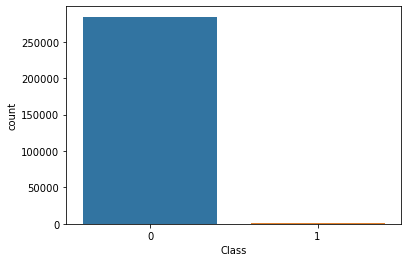

In [31]:
# Check the number of Class columns with a plot
sns.countplot(df['Class'])

In [32]:
# classify as binary
nf = df[df.Class==0]
f = df[df.Class==1]

In [33]:
#Total entries are 1.5* NO. of class-1 entries
nf = nf.sample(738)

In [34]:
#creating new Dataframe
data = f.append(nf,ignore_index=True)

In [35]:
data.shape

(1230, 30)

In [36]:
X = data.drop(['Class'],axis=1)
y=data['Class']

## Preprocessing - Data Split

In [37]:
# Stratified sampling randomly samples when dividing the training data,
# Ensure that the class proportions in the original dataset remain the same in the train and test sets

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y)

In [38]:
X_train.shape,X_test.shape

((984, 29), (246, 29))

## Data processing

In [39]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [40]:
X_train.shape[1]

29

## Search the best Parameter for the model

In [41]:
def build_model(hp):
    model = Sequential()
    i = 0
    for i in range(hp.Int('num_layers', 2,5)):
        if i==0:
            model.add(layers.Dense(units=hp.Int('units_' + str(i), 32, 150, 32),kernel_initializer='he_uniform',input_dim=X_train.shape[1],
                               activation='relu'))
            i += 1
        else:
            model.add(layers.Dense(units=hp.Int('units_' + str(i), 32, 150, 32),kernel_initializer='he_uniform',
                               activation='relu'))
        
        
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [0.001, 0.0001,0.01])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [42]:
tuner = RandomSearch(
            build_model,
            objective='accuracy',
            max_trials=5,
            executions_per_trial=3,
            directory='project1',
            project_name='Credit card fraud'
)
tuner.search_space_summary()

INFO:tensorflow:Reloading Tuner from project1\Credit card fraud\tuner0.json
Search space summary
Default search space size: 6
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 5, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 150, 'step': 32, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 150, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.001, 'conditions': [], 'values': [0.001, 0.0001, 0.01], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 150, 'step': 32, 'sampling': 'linear'}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 150, 'step': 32, 'sampling': 'linear'}


In [43]:
tuner.search(X_train,y_train,epochs=10)

INFO:tensorflow:Oracle triggered exit


In [44]:
tuner.results_summary()

Results summary
Results in project1\Credit card fraud
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 4
units_0: 128
units_1: 32
learning_rate: 0.01
units_2: 32
units_3: 32
Score: 0.9698509573936462
Trial summary
Hyperparameters:
num_layers: 4
units_0: 96
units_1: 96
learning_rate: 0.01
units_2: 32
units_3: 64
Score: 0.9691734512646993
Trial summary
Hyperparameters:
num_layers: 4
units_0: 64
units_1: 64
learning_rate: 0.01
units_2: 32
units_3: 96
Score: 0.9688346783320109
Trial summary
Hyperparameters:
num_layers: 3
units_0: 32
units_1: 64
learning_rate: 0.001
units_2: 32
Score: 0.9539295236269633
Trial summary
Hyperparameters:
num_layers: 2
units_0: 32
units_1: 96
learning_rate: 0.001
units_2: 32
units_3: 32
Score: 0.9444444378217062


## Using the best parameter

In [45]:
model = Sequential()
model.add(layers.Dense(units=128,kernel_initializer='he_uniform',input_dim=X_train.shape[1],activation='relu'))
model.add(layers.Dense(units=96,kernel_initializer='he_uniform',activation='relu'))
model.add(layers.Dense(units=128,kernel_initializer='he_uniform',activation='relu'))
model.add(layers.Dense(units=128,kernel_initializer='he_uniform',activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [46]:
history = model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test))

Epoch 1/20
31/31 [==============================] - 1s 5ms/step - loss: 0.7698 - accuracy: 0.6758 - val_loss: 0.4800 - val_accuracy: 0.8374
Epoch 2/20
31/31 [==============================] - 0s 1ms/step - loss: 0.4121 - accuracy: 0.8740 - val_loss: 0.3455 - val_accuracy: 0.9146
Epoch 3/20
31/31 [==============================] - 0s 1ms/step - loss: 0.3136 - accuracy: 0.9024 - val_loss: 0.2905 - val_accuracy: 0.9146
Epoch 4/20
31/31 [==============================] - 0s 1ms/step - loss: 0.2621 - accuracy: 0.9126 - val_loss: 0.2606 - val_accuracy: 0.9146
Epoch 5/20
31/31 [==============================] - 0s 1ms/step - loss: 0.2299 - accuracy: 0.9187 - val_loss: 0.2423 - val_accuracy: 0.9146
Epoch 6/20
31/31 [==============================] - 0s 1ms/step - loss: 0.2071 - accuracy: 0.9278 - val_loss: 0.2305 - val_accuracy: 0.9228
Epoch 7/20
31/31 [==============================] - 0s 1ms/step - loss: 0.1905 - accuracy: 0.9370 - val_loss: 0.2242 - val_accuracy: 0.9268
Epoch 8/20
31/31 [==

In [47]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

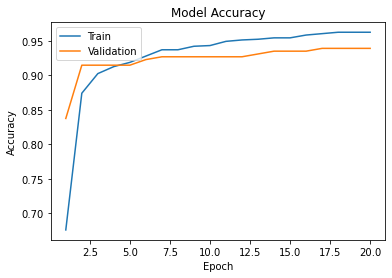

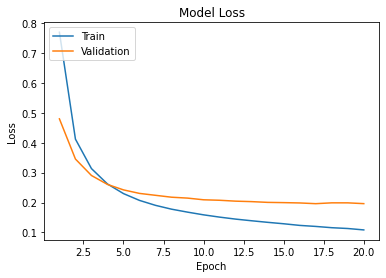

In [48]:
plotLearningCurve(history,20)

## Prediction

In [49]:
y_pred = model.predict(X_test)

8/8 [==============================] - 0s 571us/step


In [50]:
y_pred = y_pred>0.5

In [51]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[146,   2],
       [ 13,  85]], dtype=int64)

In [52]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

precision = metrics.precision_score(y_test, y_pred)
print("Precision:", precision)

recall = metrics.recall_score(y_test, y_pred)
print("Recall:", recall)

f1 = metrics.f1_score(y_test, y_pred)
print("f1 score:", f1)

Accuracy: 0.9390243902439024
Precision: 0.9770114942528736
Recall: 0.8673469387755102
f1 score: 0.9189189189189189


In [53]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_pred,y_test)
score

0.9390243902439024

# Neural Networks2_ANN

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from sklearn.model_selection import train_test_split
from keras import optimizers, metrics, callbacks

## Dataset Split

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2,  random_state=22)

In [56]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.2, random_state=22)

In [57]:
print(x_train.shape, y_train.shape)
print(x_validate.shape, y_validate.shape)
print(x_test.shape, y_test.shape)

(182276, 29) (182276, 1)
(45569, 29) (45569, 1)
(56962, 29) (56962, 1)


## Neural Network Design

In [58]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(x_train.shape[-1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(16, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(10, activation='softmax'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='sigmoid'),
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               7680      
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 128)              

## Model compile

In [59]:
model.compile(optimizer=optimizers.Adam(1e-4),
              loss = "binary_crossentropy",
              metrics =  [metrics.Recall(name="recall"),
                          metrics.Precision(name="precision")])

In [60]:
callbacks = [callbacks.ModelCheckpoint('epcoh.h5')]

# Training

batch size: 65536\
epochs: 10000\
EarlyStopping: Yes

In [61]:
history = model.fit(x_train, y_train,
                    validation_data = (x_validate, y_validate),
                    batch_size = 65536,
                    epochs = 1000,
                    callbacks = callbacks
                    )

Epoch 1/1000
3/3 [==============================] - 4s 829ms/step - loss: 0.9335 - recall: 0.7516 - precision: 0.0026 - val_loss: 0.6635 - val_recall: 0.1605 - val_precision: 0.0474
Epoch 2/1000
3/3 [==============================] - 2s 757ms/step - loss: 0.9293 - recall: 0.6918 - precision: 0.0024 - val_loss: 0.6619 - val_recall: 0.2099 - val_precision: 0.0612
Epoch 3/1000
3/3 [==============================] - 2s 758ms/step - loss: 0.9272 - recall: 0.7075 - precision: 0.0024 - val_loss: 0.6604 - val_recall: 0.2716 - val_precision: 0.0767
Epoch 4/1000
3/3 [==============================] - 2s 768ms/step - loss: 0.9238 - recall: 0.7421 - precision: 0.0026 - val_loss: 0.6589 - val_recall: 0.3333 - val_precision: 0.0888
Epoch 5/1000
3/3 [==============================] - 2s 749ms/step - loss: 0.9189 - recall: 0.7075 - precision: 0.0024 - val_loss: 0.6575 - val_recall: 0.3704 - val_precision: 0.0955
Epoch 6/1000
3/3 [==============================] - 2s 740ms/step - loss: 0.9166 - recall:

In [62]:
score = model.evaluate(x_test, y_test)
print(score)

1781/1781 [==============================] - 1s 726us/step - loss: 0.1567 - recall: 0.8172 - precision: 0.8444
[0.15671207010746002, 0.8172042965888977, 0.8444444537162781]


# Training Visualization

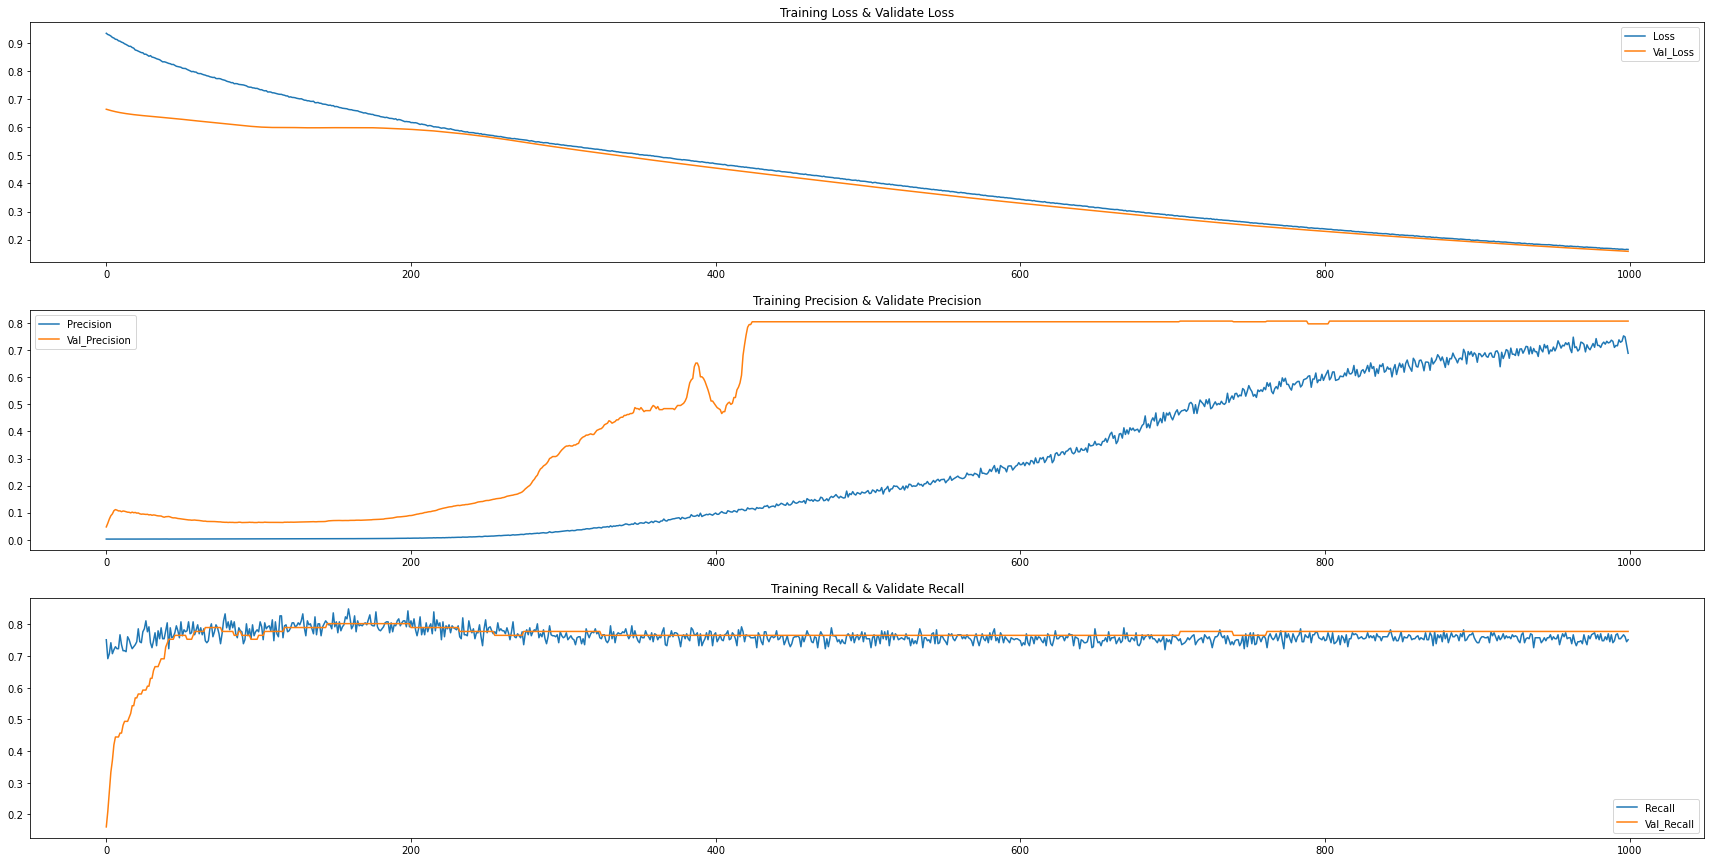

In [63]:
plt.figure(figsize = (30,15))

plt.subplot(3,1,1)
plt.plot(history.history["loss"], label = "Loss")
plt.plot(history.history["val_loss"], label = "Val_Loss")
plt.title("Training Loss & Validate Loss")
plt.legend()

plt.subplot(3,1,2)
plt.plot(history.history["precision"], label = "Precision")
plt.plot(history.history["val_precision"], label = "Val_Precision")
plt.title("Training Precision & Validate Precision")
plt.legend()

plt.subplot(3,1,3)
plt.plot(history.history["recall"], label = "Recall")
plt.plot(history.history["val_recall"], label = "Val_Recall")
plt.title("Training Recall & Validate Recall")
plt.legend()

# ANN Performance

In [64]:
Ann_predict = tf.cast( model.predict(x_test) > 0.5, dtype = tf.float32)
print("Test Report = \n", classification_report(Ann_predict, y_test))

1781/1781 [==============================] - 1s 593us/step
Test Report = 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56872
         1.0       0.82      0.84      0.83        90

    accuracy                           1.00     56962
   macro avg       0.91      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962

